In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [3]:
reg1=DecisionTreeClassifier(max_depth=5)
reg1.fit(X,y).score(X,y)

1.0

In [7]:
t=reg1.fit(X,y)
print(t)
t.score?

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [8]:
reg2 = KNeighborsClassifier()
reg2.fit(X,y).score(X,y)

0.9666666666666667

In [9]:
reg3 = LogisticRegression()
reg3.fit(X,y).score(X,y)

0.96

In [10]:
np.random.RandomState == np.random.seed()

NameError: name 'np' is not defined

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [15]:
# 创建X与y
rng = np.random.RandomState(1) #伪随机数 == 
np.random.seed(1)

#随机生成-100 到100的数字,这些数字就是角度
X = np.sort(200 * rng.rand(100,1) - 100,axis = 0)
#根据角度生成正弦值和余弦值，这些值就是圆上面的点
y = np.array([np.pi * np.sin(X).ravel(),np.pi * np.cos(X).ravel()]).transpose()
y[::5,:] += (0.5 -rng.rand(20,2))#添加噪声

In [42]:
# 参数max_depth越大，越容易过拟合
# 第1步：训练
regr1 = DecisionTreeRegressor(max_depth=2)
regr2 = DecisionTreeRegressor(max_depth=5)
regr3 = DecisionTreeRegressor(max_depth=8)
regr4 = DecisionTreeRegressor(max_depth=20)

regr1.fit(X,y)
regr2.fit(X,y)
regr3.fit(X,y)
regr4.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [43]:
# 第2步：预测
X_test = np.arange(-100.0,100.0,0.01)[:,np.newaxis]
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)
y_3 = regr3.predict(X_test)
y_4 = regr4.predict(X_test)

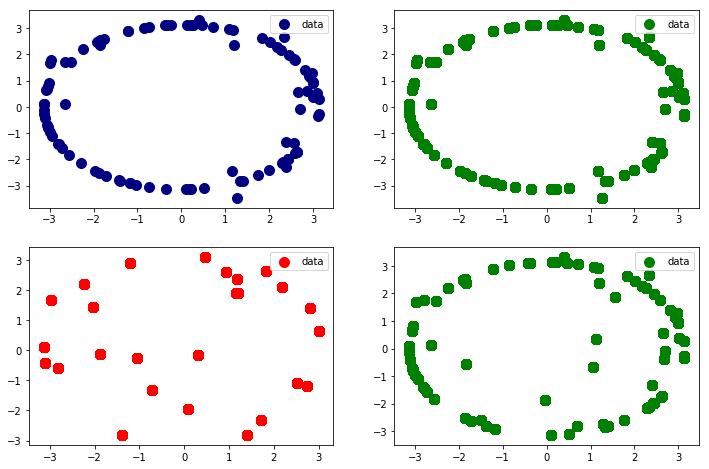

In [52]:
# 显示图像
plt.figure(figsize=(12,8))
s = 100

plt.subplot(221)
plt.scatter(y[:,0],y[:,1],c='navy',s=s,label='data')
plt.legend()

# plt.subplot(222)
# plt.scatter(y_1[:,0],y_1[:,1],c='b',s=s,label='data')
# plt.legend()

plt.subplot(223)
plt.scatter(y_2[:,0],y_2[:,1],c='r',s=s,label='data')
plt.legend()

plt.subplot(224)
plt.scatter(y_3[:,0],y_3[:,1],c='g',s=s,label='data')
plt.legend()

# plt.subplot(224)
# plt.scatter(y_4[:,0],y_4[:,1],c='g',s=s,label='data')
# plt.legend()

plt.show()

In [63]:
#一个 . 表示当前目录 .. 表示上级目录
import numpy as np
import pandas as pd
data = pd.read_table('./Bayes/exercise/lenses.txt',header = None)
data.head()

,0,1,2,3,4
0,young,myope,no,reduced,no lenses
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,no lenses
3,young,myope,yes,normal,hard
4,young,hyper,no,reduced,no lenses


In [64]:
display(data[0].unique(),data[1].unique(),data[2].unique(),data[3].unique(),data[4].unique())

# 输出：
# array(['young', 'pre', 'presbyopic'], dtype=object)
# array(['myope', 'hyper'], dtype=object)
# array(['no', 'yes'], dtype=object)
# array(['reduced', 'normal'], dtype=object)
# array(['no lenses', 'soft', 'hard'], dtype=object)



dic0 = {
    'young':0,
    'pre':1,
    'presbyopic':2
}
data[0] = data[0].map(dic0)
print(data[0])

# 其他列类似
dic1 = {
    'myope':0,
    'hyper':1
}
data[1] = data[1].map(dic1)
print(data[1])

dic2 = {
    'no':0,
    'yes':1
}
data[2] = data[2].map(dic2)
print(data[2])


dic3 = {
    'reduced':0,
    'normal':1
}
data[3] = data[3].map(dic3)
print(data[3])


dic4 = {
    'no lenses':0,
    'soft':1,
    'hard':2
}
data[4] = data[4].map(dic4)
print(data[4])

array(['young', 'pre', 'presbyopic'], dtype=object)

array(['myope', 'hyper'], dtype=object)

array(['no', 'yes'], dtype=object)

array(['reduced', 'normal'], dtype=object)

array(['no lenses', 'soft', 'hard'], dtype=object)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
Name: 0, dtype: int64
0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    0
17    0
18    0
19    0
20    1
21    1
22    1
23    1
Name: 1, dtype: int64
0     0
1     0
2     1
3     1
4     0
5     0
6     1
7     1
8     0
9     0
10    1
11    1
12    0
13    0
14    1
15    1
16    0
17    0
18    1
19    1
20    0
21    0
22    1
23    1
Name: 2, dtype: int64
0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
11    1
12    0
13    1
14    0
15    1
16    0
17    1
18    0
19    1
20    0
21    1
22    0
23    1
Name: 3, dtype: int64
0     0
1     1
2     0
3     2
4     0
5     1
6     0
7     2
8     0
9     1
10    0
11    2
12    0
13    1
14    0
15    0
16    0
17    0


In [75]:
data

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,1,1
2,0,0,1,0,0
3,0,0,1,1,2
4,0,1,0,0,0
5,0,1,0,1,1
6,0,1,1,0,0
7,0,1,1,1,2
8,1,0,0,0,0
9,1,0,0,1,1


In [72]:
x_train,x_test = data.iloc[:-2,:-1],data.iloc[-2:,:-1]
y_train,y_test = data[4][:-2],data[4][-2:]

In [74]:
data[4][-2:]

22    0
23    0
Name: 4, dtype: int64

In [76]:
# 建立模型
clf = DecisionTreeClassifier()
# 训练
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
p_data = clf.predict(data.iloc[-2:,:-1])
display(p_data,data[4][-2:])

# 测试结果和真是结果相吻合

# array(['no lenses', 'no lenses'], dtype=object)

# 22    no lenses
# 23    no lenses
# Name: 4, dtype: object

array([0, 0], dtype=int64)

22    0
23    0
Name: 4, dtype: int64